In [47]:
import pandas as pd
import util
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

pd.set_option("display.max_columns", None)

**Corey -**<br>
Changing it from csv to xlsx is unnecessary so I commented it out. The links that were pushed were also specific to someone's file path so I replaced it with a general path.

In [48]:
#data = pd.read_csv(r'Healthcare_dataset.csv')

#xls.sheet_names

In [49]:
data = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
util.df_info(data, 'Healthcare_dataset.xlsx')


    Number of columns: 69
    Number of rows: 3424
    File size: 0.88MB 
    


In [50]:
#data = pd.read_csv(r'/Users/Francis/Desktop/Healthcare_dataset.csv')
data = data.drop_duplicates()
data = data.dropna()
#Changing the column names to lower case
data.columns = [ x.lower().strip() for x in data.columns]
data.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

# Use this code to clean the data -Fran
Dropping duplicates (if any)
Dropping Null (if any)
Lower casing the title names

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [52]:
data.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


**Motamen -** <br>
I removed the ptid variable as it is not needed and does not add any useful information

In [53]:
data =data.drop(columns = ['ptid'])

for col in data.columns:
    print(data[col].value_counts())

Non-Persistent    2135
Persistent        1289
Name: persistency_flag, dtype: int64
Female    3230
Male       194
Name: gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: age_bucket, dtype: int64
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                      

**Corey -**<br>
I moved this code into the util file to make it easier to comment out when needed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


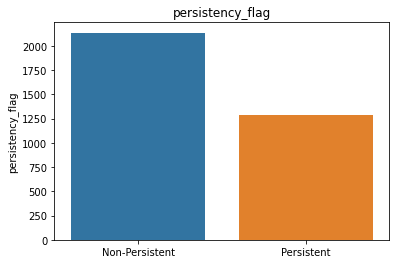

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


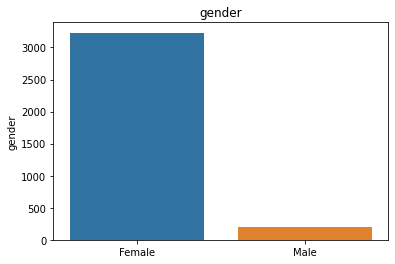

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


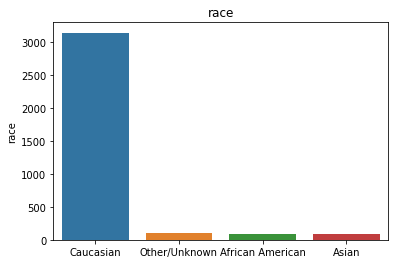

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


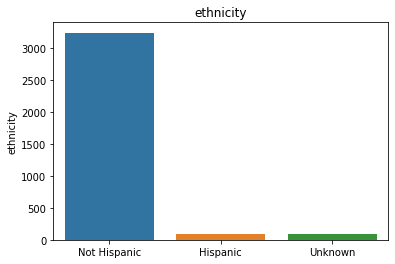

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


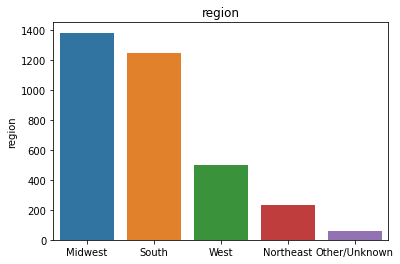

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


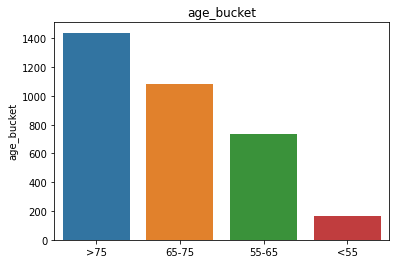

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


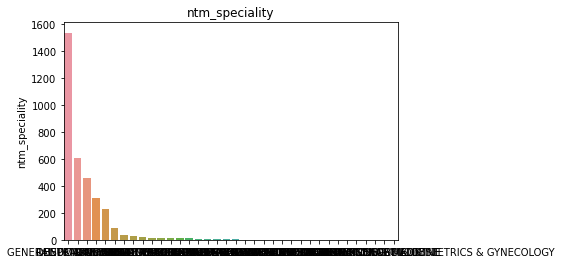

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


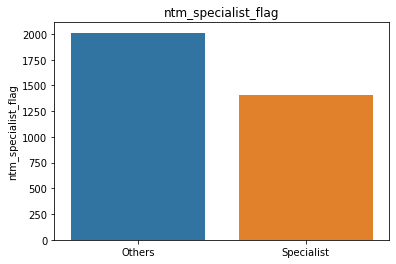

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


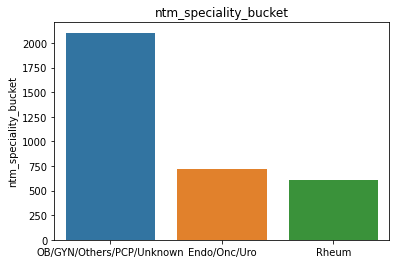

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


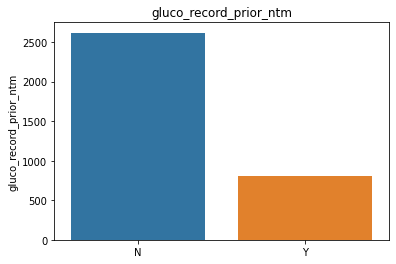

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


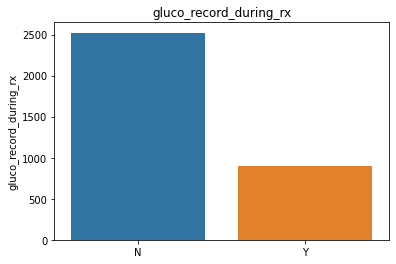

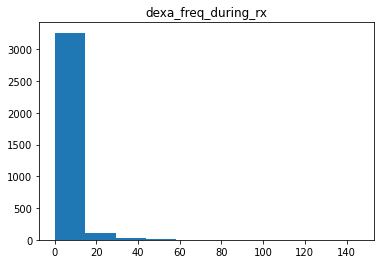

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


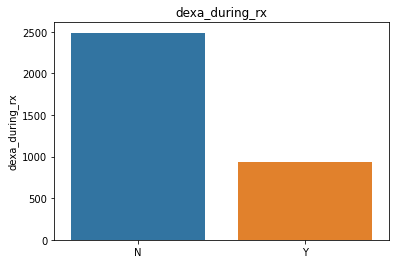

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


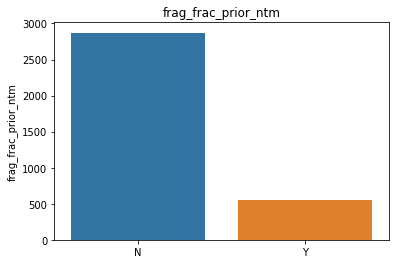

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


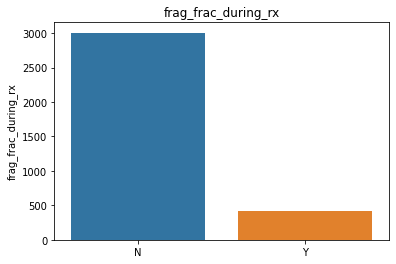

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


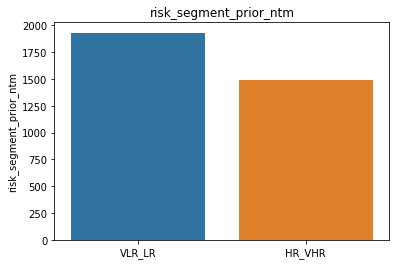

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


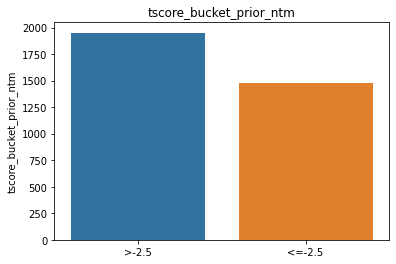

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


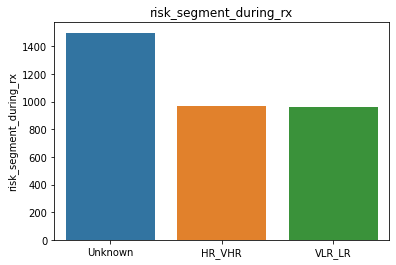

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


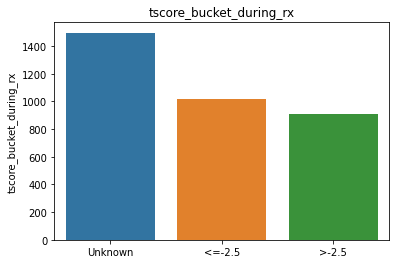

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


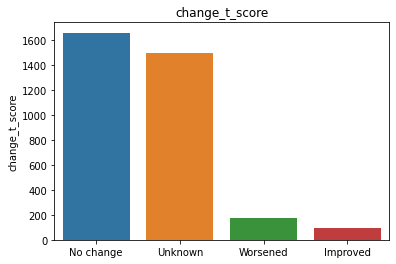

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


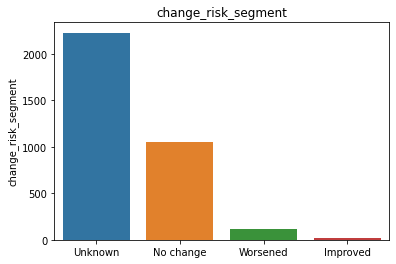

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


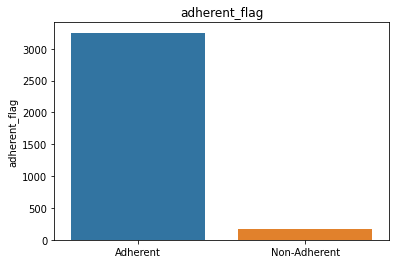

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


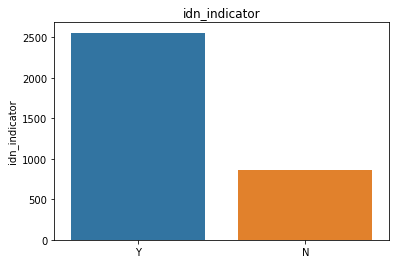

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


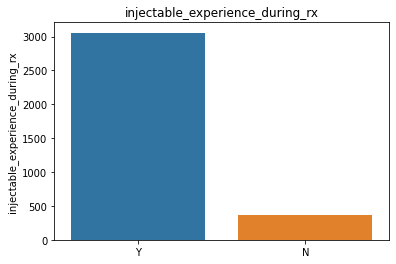

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


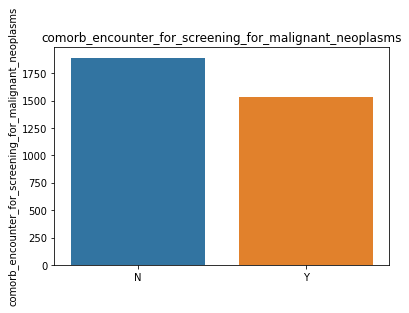

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


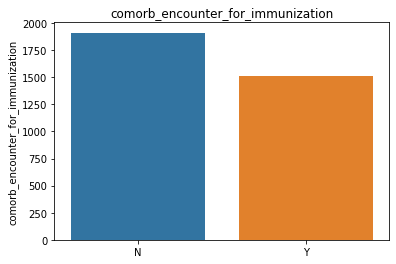

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


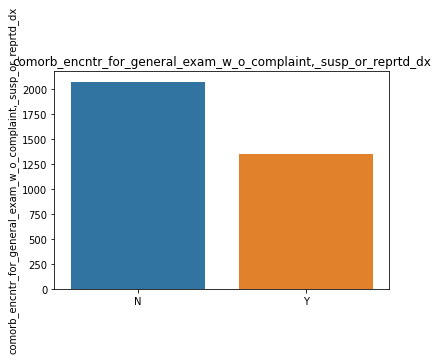

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


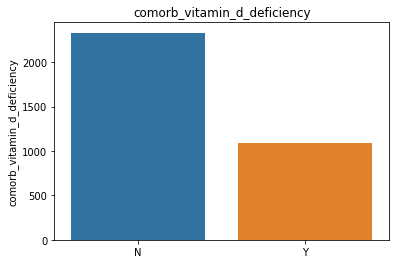

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


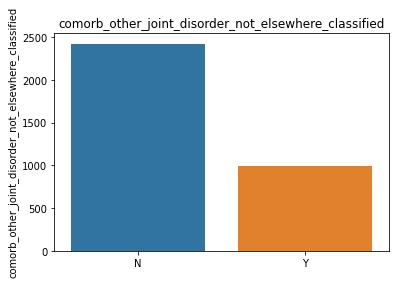

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


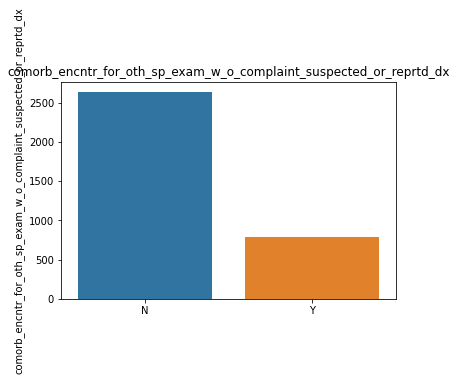

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


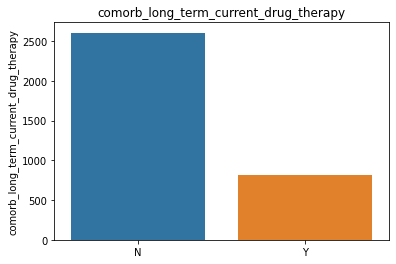

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


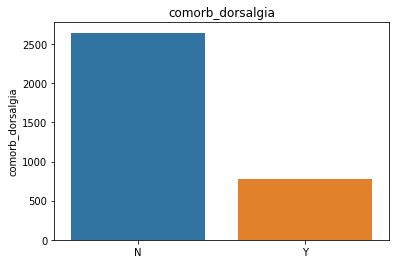

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


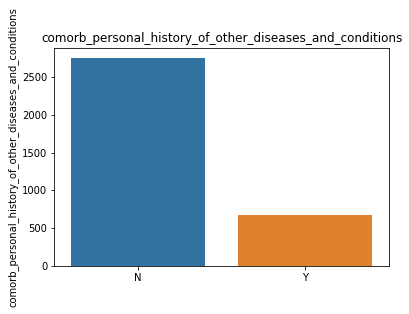

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


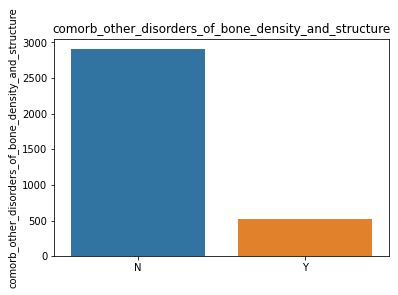

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


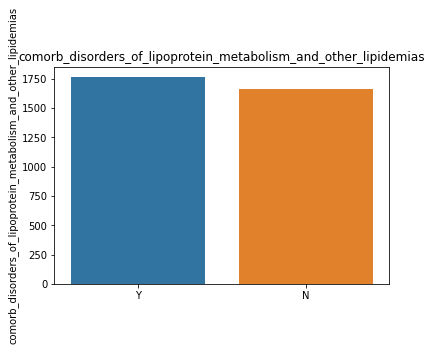

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


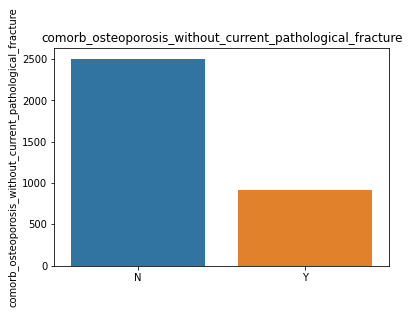

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


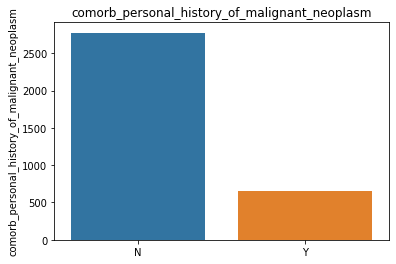

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


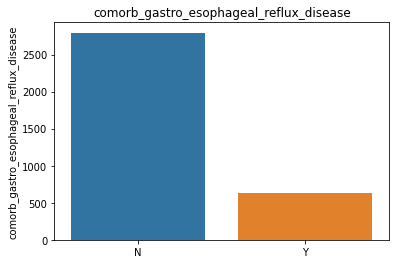

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


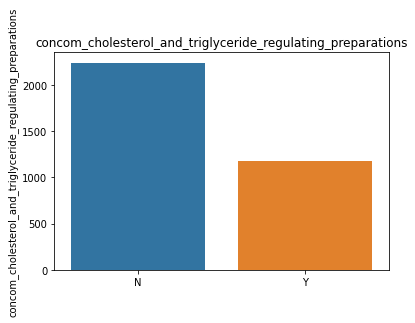

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


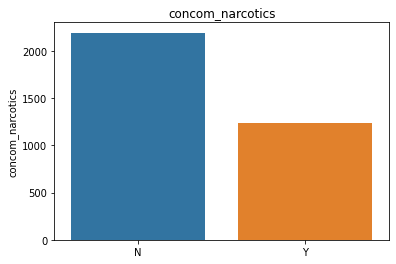

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


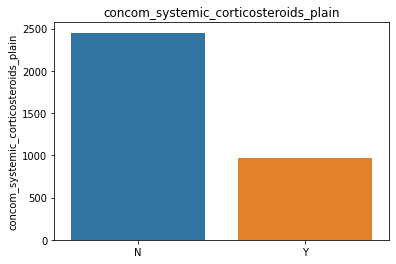

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


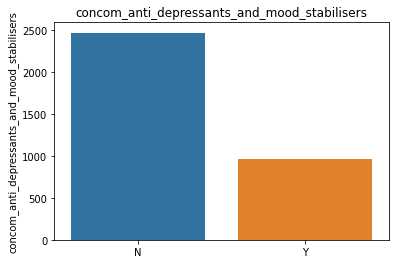

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


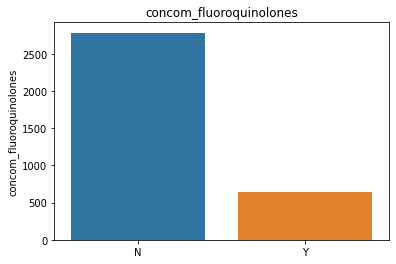

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


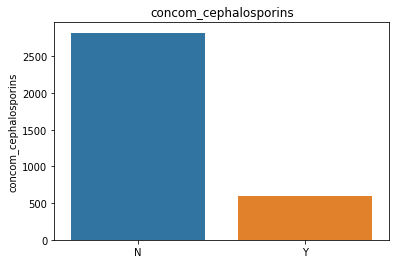

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


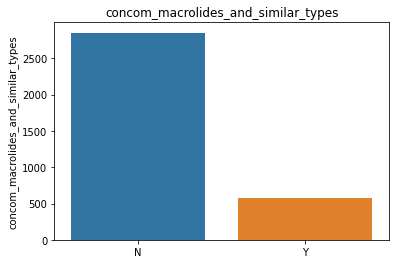

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


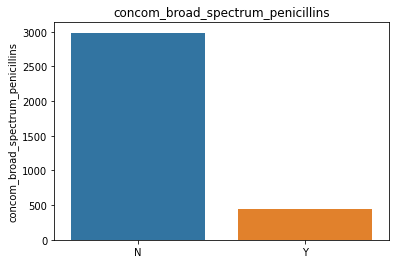

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


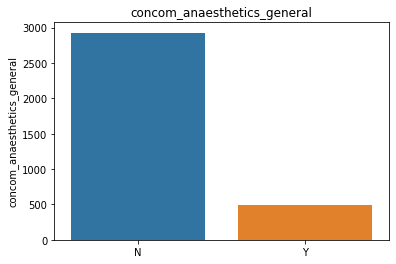

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


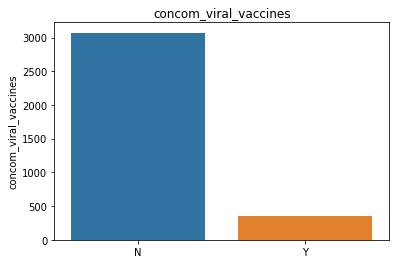

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


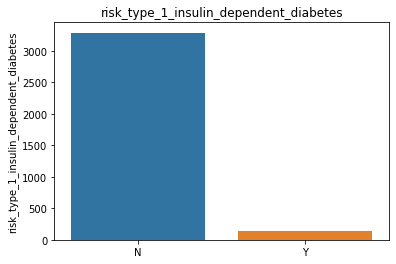

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


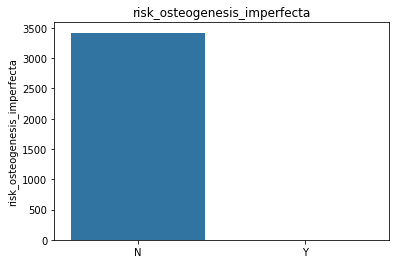

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


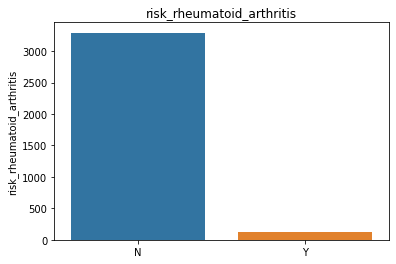

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


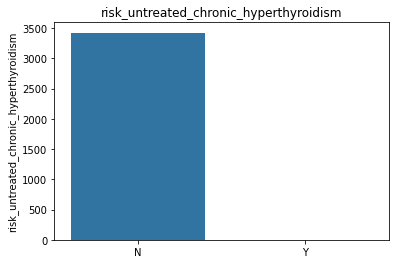

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


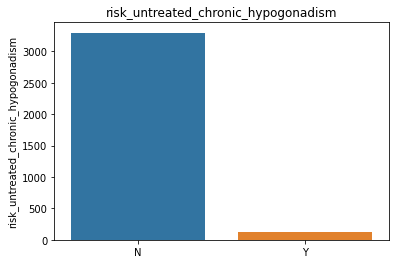

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


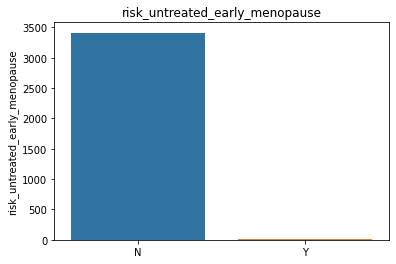

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


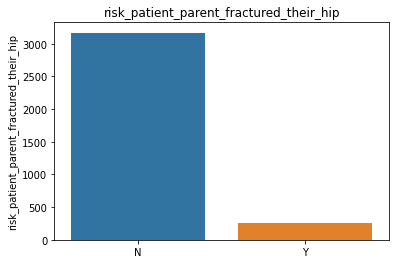

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


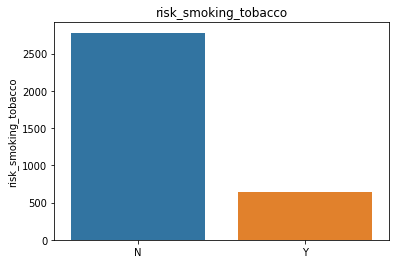

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


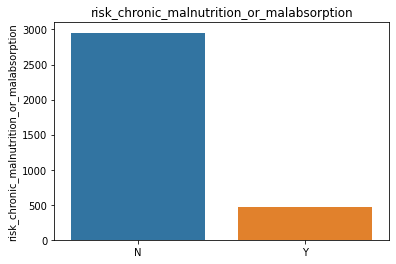

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


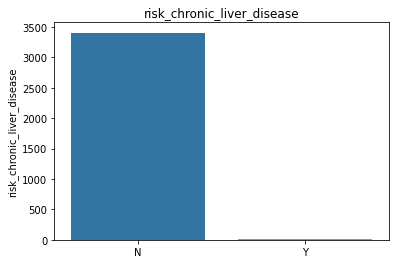

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


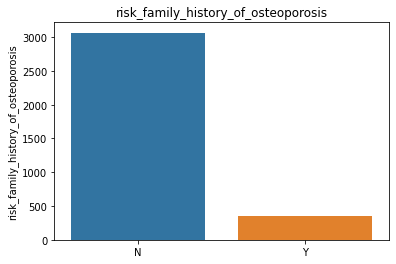

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


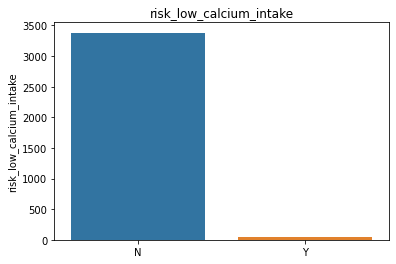

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


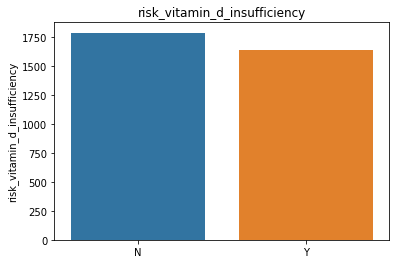

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


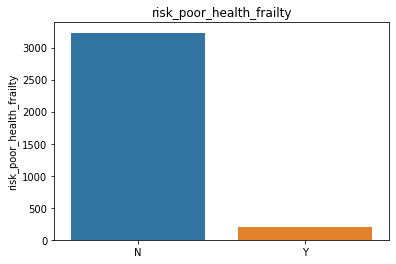

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


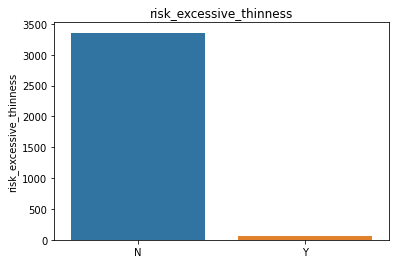

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


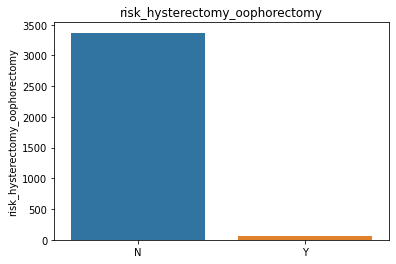

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


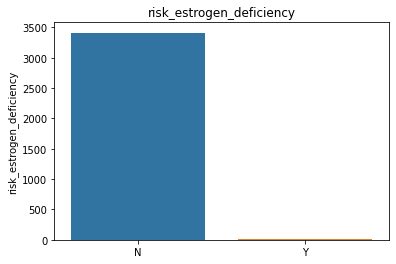

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


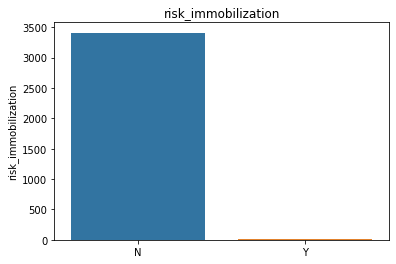

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


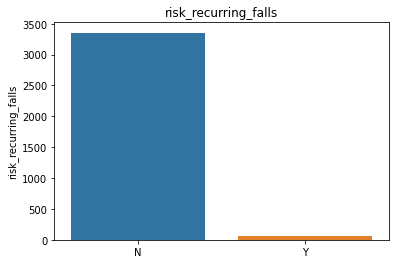

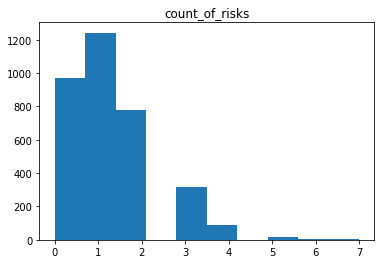

<Figure size 432x288 with 0 Axes>

In [54]:
util.columns_graph(data)

Inna - 

pie for Age 

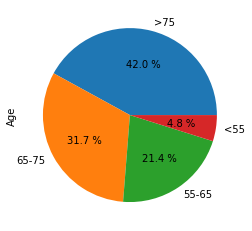

In [55]:
fig = pd.Series(data.age_bucket)
fig.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Age')

In [56]:
data.groupby(['gender']).count()

,persistency_flag,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230
Male,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194


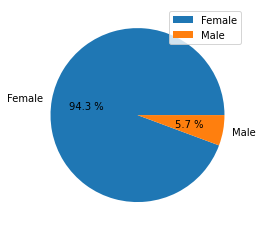

In [57]:
s = pd.Series(data.gender)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

In [58]:
data.groupby(['region']).count()


,persistency_flag,gender,race,ethnicity,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
Northeast,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
Other/Unknown,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
South,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
West,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502


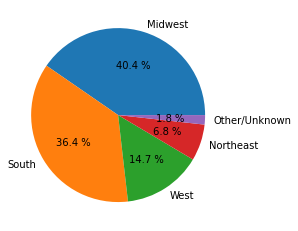

In [59]:
r = pd.Series(data.region)
r.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='')

In [60]:
data.groupby(['race']).count()


,persistency_flag,gender,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African American,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
Asian,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Caucasian,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148
Other/Unknown,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97


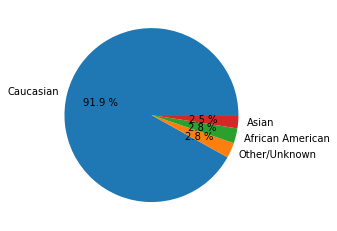

In [61]:
a = pd.Series(data.race)
a.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='')

**Corey -** <br>
*ntm_speciality* has too many values with low counts. To address this I have put all keys with values into an `Other` bin to lower its dimensionality.

In [62]:
print(data.ntm_speciality.value_counts())
speciality = ['GENERAL PRACTITIONER', 'RHEUMATOLOGY', 'ENDOCRINOLOGY', 'Unknown', 'ONCOLOGY', 'OBSTETRICS AND GYNECOLOGY']
data.ntm_speciality = data.ntm_speciality.apply(lambda x: x if x in speciality else 'Other')
print(data.ntm_speciality.value_counts())

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
OTOLARYNGOLOGY                                                      14
HEMATOLOGY & ONCOLOGY                                               14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
SURGER

**Corey -**<br>
Below I am turning the binary categorical data into numeric. The following cell loops through all columns with 'Y', 'N' values.

**Francis_**<br>
This one also ends up changing all binary values into only 1s

**Corey -**<br>
Fixed the issue


In [63]:
#yn_binary = ['gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'idn_indicator', 'injectable_experience_during_rx',
#'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
#'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
#'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure',
#'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'comorb_osteoporosis_without_current_pathological_fracture',
#'comorb_personal_history_of_malignant_neoplasm', 'comorb_gastro_esophageal_reflux_disease', 'concom_cholesterol_and_triglyceride_regulating_preparations',
#'concom_narcotics', 'concom_systemic_corticosteroids_plain', 'concom_anti_depressants_and_mood_stabilisers', 'concom_fluoroquinolones', 'concom_cephalosporins',
#'concom_macrolides_and_similar_types', 'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general', 'concom_viral_vaccines', 'risk_type_1_insulin_dependent_diabetes',
#'risk_osteogenesis_imperfecta', 'risk_rheumatoid_arthritis', 'risk_untreated_chronic_hyperthyroidism', 'risk_untreated_chronic_hypogonadism', 'risk_untreated_early_menopause',
#'risk_patient_parent_fractured_their_hip', 'risk_smoking_tobacco', 'risk_chronic_malnutrition_or_malabsorption', 'risk_chronic_liver_disease', 'risk_family_history_of_osteoporosis',
#'risk_low_calcium_intake', 'risk_vitamin_d_insufficiency', 'risk_poor_health_frailty', 'risk_excessive_thinness', 'risk_hysterectomy_oophorectomy', 'risk_estrogen_deficiency',
#'risk_immobilization']

#for col in yn_binary:
    #data[col] = data[col].apply(lambda x: 1 if x == 'Y' else 0)
    #print(data[col].value_counts())


**Corey -**<br>
In the following cell I am converting the binary columns that have different values into numerical values. <br>
I created 2 new columns with titles that I feel more accuratly fit the binary data. I have not yet removed the original columns.

**Francis -**<br>
I believe it is this code below that is altering the dataset to be all '1's rather than distinguishing

**Corey -**<br>
Fixed the issue

**Motamen -**<br>

gender, ntm_specialist_flag, and adherent_flag have all 0s according to the print statement. I will comment this cell and fix it. 
Have a look and feel free to change if it is needed.


In [64]:

#data.gender = data.gender.apply(lambda x: 1 if x == 'Female' else 0)
#data.ntm_specialist_flag = data.ntm_specialist_flag.apply(lambda x: 1 if x == 'Specialist' else 0)
#data.adherent_flag = data.adherent_flag.apply(lambda x: 1 if x == 'Adherent' else 0)

#data['risk_segment_prior_ntm_vlr'] = data.risk_segment_prior_ntm.apply(lambda x: 1 if x == 'VLR_LR' else 0)
#data['tscore_bucket_prior_ntm_gt_neg_25'] = data.tscore_bucket_prior_ntm.apply(lambda x: 1 if x == '>-2.5' else 0)

#print(data.gender.value_counts())
#print(data.ntm_specialist_flag.value_counts())
#print(data.adherent_flag.value_counts())
#print(data['risk_segment_prior_ntm_vlr'].value_counts())
#print(data['tscore_bucket_prior_ntm_gt_neg_25'].value_counts())


In [65]:
#data.head(10)

**Motamen -** <br> 
changing the persistency flag (target variable) into 0s and 1s for non persistent and persistent respectively

In [66]:
#apply label encoder to convert target variable into numerical
le = LabelEncoder()
data.persistency_flag = le.fit_transform(data.persistency_flag)
data.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,0,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,0,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


# **WOE Features**

In [67]:
# Let us convert the categorical features into woe features
# Install the module
!pip install category_encoders

In [68]:
import category_encoders as ce


features = data.drop(columns=['persistency_flag'])
target = data.persistency_flag

for i in features.columns:
    if i =='count_of_risks' or i== 'dexa_freq_during_rx':
        print('Skip...')
        continue
    else:

        woe_encoder = ce.WOEEncoder(cols=[i])
        woe_encoded_train = woe_encoder.fit_transform(features[i], target).add_suffix('_woe')
        features = features.join(woe_encoded_train)

woe_features = features.drop(columns = data.drop(columns=['persistency_flag']).columns.tolist())
woe_features['count_of_risks'] = data.count_of_risks
woe_features['dexa_freq_during_rx'] = data.dexa_freq_during_rx
#woe_encoded_cols = woe_encoded_train.columns

print(woe_features.shape)
#X.head(10)

Skip...
Skip...
(3424, 67)


In [69]:
woe_features.head()

,gender_woe,race_woe,ethnicity_woe,region_woe,age_bucket_woe,ntm_speciality_woe,ntm_specialist_flag_woe,ntm_speciality_bucket_woe,gluco_record_prior_ntm_woe,gluco_record_during_rx_woe,dexa_during_rx_woe,frag_frac_prior_ntm_woe,frag_frac_during_rx_woe,risk_segment_prior_ntm_woe,tscore_bucket_prior_ntm_woe,risk_segment_during_rx_woe,tscore_bucket_during_rx_woe,change_t_score_woe,change_risk_segment_woe,adherent_flag_woe,idn_indicator_woe,injectable_experience_during_rx_woe,comorb_encounter_for_screening_for_malignant_neoplasms_woe,comorb_encounter_for_immunization_woe,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx_woe",comorb_vitamin_d_deficiency_woe,comorb_other_joint_disorder_not_elsewhere_classified_woe,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx_woe,comorb_long_term_current_drug_therapy_woe,comorb_dorsalgia_woe,comorb_personal_history_of_other_diseases_and_conditions_woe,comorb_other_disorders_of_bone_density_and_structure_woe,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias_woe,comorb_osteoporosis_without_current_pathological_fracture_woe,comorb_personal_history_of_malignant_neoplasm_woe,comorb_gastro_esophageal_reflux_disease_woe,concom_cholesterol_and_triglyceride_regulating_preparations_woe,concom_narcotics_woe,concom_systemic_corticosteroids_plain_woe,concom_anti_depressants_and_mood_stabilisers_woe,concom_fluoroquinolones_woe,concom_cephalosporins_woe,concom_macrolides_and_similar_types_woe,concom_broad_spectrum_penicillins_woe,concom_anaesthetics_general_woe,concom_viral_vaccines_woe,risk_type_1_insulin_dependent_diabetes_woe,risk_osteogenesis_imperfecta_woe,risk_rheumatoid_arthritis_woe,risk_untreated_chronic_hyperthyroidism_woe,risk_untreated_chronic_hypogonadism_woe,risk_untreated_early_menopause_woe,risk_patient_parent_fractured_their_hip_woe,risk_smoking_tobacco_woe,risk_chronic_malnutrition_or_malabsorption_woe,risk_chronic_liver_disease_woe,risk_family_history_of_osteoporosis_woe,risk_low_calcium_intake_woe,risk_vitamin_d_insufficiency_woe,risk_poor_health_frailty_woe,risk_excessive_thinness_woe,risk_hysterectomy_oophorectomy_woe,risk_estrogen_deficiency_woe,risk_immobilization_woe,risk_recurring_falls_woe,count_of_risks,dexa_freq_during_rx
0,0.09001,-0.000411,0.011736,0.280842,-0.028737,-0.240354,-0.24933,-0.245251,0.006365,-0.272971,-0.70138,-0.000535,-0.083284,0.022028,0.033649,0.316719,0.261390,0.190986,-0.130556,-0.054181,-0.419566,0.069549,-0.670012,0.695993,0.705552,-0.252861,-0.323962,0.765235,-0.435766,0.779727,0.870326,-0.222359,-0.367222,-0.179015,-0.178916,-0.223154,-0.193175,-0.310734,-0.331498,-0.144495,-0.188624,-0.217994,-0.210781,-0.160174,-0.194287,-0.159047,0.007899,-0.000146,-0.022404,0.00063,-0.02775,0.00034,-0.005158,-0.098818,-0.040907,-0.003086,0.00219,0.001976,-0.160802,0.02241,0.011379,0.003901,0.001117,0.006269,0.006008,0,0
1,0.09001,0.457466,0.011736,0.280842,-0.086765,-0.240354,-0.24933,-0.245251,0.006365,-0.272971,-0.70138,-0.000535,-0.083284,0.022028,0.033649,-0.452819,-0.452819,-0.452819,-0.130556,-0.054181,-0.419566,0.069549,-0.670012,-0.643313,0.705552,-0.252861,-0.323962,-0.250135,-0.435766,-0.249855,-0.232587,-0.222359,-0.367222,-0.179015,-0.178916,-0.223154,-0.193175,-0.310734,-0.331498,-0.144495,-0.188624,-0.217994,-0.210781,-0.160174,-0.194287,-0.159047,0.007899,-0.000146,-0.022404,0.00063,-0.02775,0.00034,-0.005158,-0.098818,-0.040907,-0.003086,0.00219,0.001976,-0.160802,0.02241,0.011379,0.003901,0.001117,0.006269,0.006008,0,0
2,-0.00552,-0.144041,-0.204199,-0.227313,0.093923,-0.240354,-0.24933,-0.245251,0.006365,-0.272971,-0.70138,-0.000535,-0.083284,-0.028661,-0.044992,0.319389,0.261390,0.190986,0.139471,-0.054181,-0.419566,0.069549,0.703999,-0.643313,0.705552,-0.252861,-0.323962,-0.250135,-0.435766,-0.249855,-0.232587,-0.222359,-0.367222,-0.179015,-0.178916,-0.223154,0.344867,-0.310734,-0.331498,-0.144495,-0.188624,-0.217994,-0.210781,-0.160174,-0.194287,-0.159047,0.007899,-0.000146,-0.022404,0.00063,-0.02775,0.00

In [70]:
woe_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   gender_woe                                                              3424 non-null   float64
 1   race_woe                                                                3424 non-null   float64
 2   ethnicity_woe                                                           3424 non-null   float64
 3   region_woe                                                              3424 non-null   float64
 4   age_bucket_woe                                                          3424 non-null   float64
 5   ntm_speciality_woe                                                      3424 non-null   float64
 6   ntm_specialist_flag_woe                                                 3424 non

In [71]:
data['gluco_record_prior_ntm'].value_counts()

N    2619
Y     805
Name: gluco_record_prior_ntm, dtype: int64

**Francis_**<br>
Use the replace function to replace all categorical Ys and Ns to 1s and 0s

**Corey -**<br>
This code is easier to read than mine and should be used instead

In [72]:
data = data.replace(to_replace=['N', 'Y'], value=[0, 1])

In [73]:
data['gluco_record_prior_ntm'].value_counts()

0    2619
1     805
Name: gluco_record_prior_ntm, dtype: int64

Inna - 
corr func for all the features.

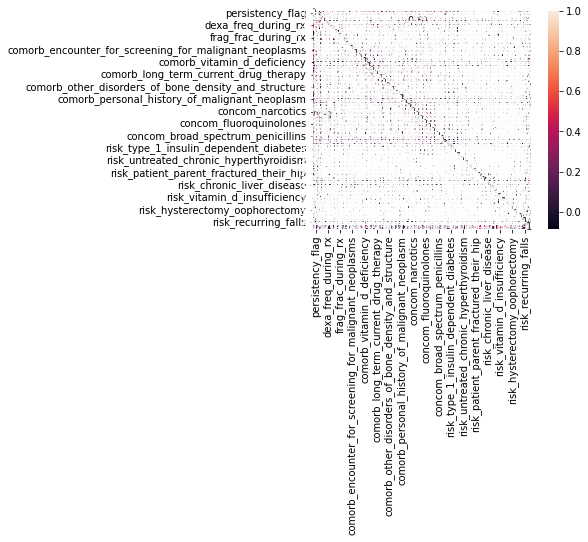

In [74]:
corr = data.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

**Motamen -** <br>
Converting all categorical features to numerical

In [75]:
#apply ordinal encoder to convert all the categorical features (binary and non-binary)
oe = OrdinalEncoder(dtype = int)
data.gender = le.fit_transform(data.gender)
for i in data.columns:
    if i=='count_of_risks':
        continue
    else:
        data[i] = oe.fit_transform(data[i].to_numpy().reshape(-1 , 1))
data.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,1,1,2,1,4,3,1,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,1,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,1,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


**Motamen -**<br>
You can see that all features are numerical (except for the ptid, which will be excluded later on)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   persistency_flag                                                    3424 non-null   int64
 1   gender                                                              3424 non-null   int64
 2   race                                                                3424 non-null   int64
 3   ethnicity                                                           3424 non-null   int64
 4   region                                                              3424 non-null   int64
 5   age_bucket                                                          3424 non-null   int64
 6   ntm_speciality                                                      3424 non-null   int64
 7   ntm_specialist_flag              

In [77]:
data.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,1,1,2,1,4,3,1,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,1,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,1,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


# **Model Build**

**Motamen** - <br>
I will try different types of models

In [78]:
#separet the data into features and target
feat = data.drop(columns = ['persistency_flag'])
target = data.persistency_flag

#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feat , target , test_size=0.3 , random_state=42)
woe_train, woe_test, y_woe_train, y_woe_test = train_test_split(woe_features , target , test_size=0.3 , random_state=42)
print("Train",x_train.shape,y_train.shape)
print("Test",x_test.shape,y_test.shape)

print("Train_woe",woe_train.shape,y_woe_train.shape)
print("Test_woe",woe_test.shape,y_woe_test.shape)

Train (2396, 67) (2396,)
Test (1028, 67) (1028,)
Train_woe (2396, 67) (2396,)
Test_woe (1028, 67) (1028,)


# **SVM Model with Holdout**

**Motamen -** <br>
Trying random split for training and testing

In [79]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)

from sklearn import metrics
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),5))
print("Precision:",round(metrics.precision_score(y_test, y_pred),5))
print("Recall:",round(metrics.recall_score(y_test, y_pred),5))
print("f1-measure:",round(metrics.f1_score(y_test, y_pred),5))

Accuracy: 0.80253
Precision: 0.78788
Recall: 0.62567
f1-measure: 0.69747


# **SVM Model with Cross Validation**

**Motamen -** <br>
Trying cross validation with 10 folds and taking the mean of each measure

In [80]:
svm_model = svm.SVC()

from sklearn.model_selection import cross_val_score
svm_acc = cross_val_score(svm_model , feat , target , scoring='accuracy' ,  cv=10)
svm_prec = cross_val_score(svm_model , feat , target , scoring='precision' , cv=10)
svm_rec = cross_val_score(svm_model ,  feat , target , scoring='recall' , cv=10)
svm_f1 = cross_val_score(svm_model ,  feat , target , scoring='f1' , cv=10)

from statistics import mean
print("Mean accuracy:",round(mean(svm_acc),5))
print("Mean precision:",round(mean(svm_prec),5))
print("Mean recall:",round(mean(svm_rec),5))
print("Mean f1-measure:",round(mean(svm_f1),5))

Mean accuracy: 0.79759
Mean precision: 0.79383
Mean recall: 0.63152
Mean f1-measure: 0.69976


# **Random Forest with Holdout**

**Motamen -** <br>
this is an example of ensemble models

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

from sklearn import metrics
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),5))
print("Precision:",round(metrics.precision_score(y_test, y_pred),5))
print("Recall:",round(metrics.recall_score(y_test, y_pred),5))
print("f1-measure:",round(metrics.f1_score(y_test, y_pred),5))

Accuracy: 0.80447
Precision: 0.75516
Recall: 0.68449
f1-measure: 0.71809


# **Random Forest with Cross Validation**

**Motamen -** <br>
Trying random forest with cross validation and taking the mean of each measure

In [82]:
rf_model = RandomForestClassifier(n_estimators=100)


rf_acc = cross_val_score(rf_model , feat , target , scoring='accuracy' ,  cv=10)
rf_prec = cross_val_score(rf_model , feat , target , scoring='precision' , cv=10)
rf_rec = cross_val_score(rf_model ,  feat , target , scoring='recall' , cv=10)
rf_f1 = cross_val_score(rf_model ,  feat , target , scoring='f1' , cv=10)


print("Mean accuracy:",round(mean(rf_acc),5))
print("Mean precision:",round(mean(rf_prec),5))
print("Mean recall:",round(mean(rf_rec),5))
print("Mean f1-measure:",round(mean(rf_f1),5))

Mean accuracy: 0.80401
Mean precision: 0.77623
Mean recall: 0.65557
Mean f1-measure: 0.70859


# **Gradient Boosting Model with Holdout**

**Motamen -** <br>
Trying a boosting model with random split

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3).fit(x_train, y_train)

y_pred = grad.predict(x_test)

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),5))
print("Precision:",round(metrics.precision_score(y_test, y_pred),5))
print("Recall:",round(metrics.recall_score(y_test, y_pred),5))
print("f1-measure:",round(metrics.f1_score(y_test, y_pred),5))

Accuracy: 0.80837
Precision: 0.74652
Recall: 0.71658
f1-measure: 0.73124


# **Gradient Boosting Model with Cross Validation**

**Motamen -** <br>
Trying a boosting model with cross validation and taking the mean of each measure

In [84]:
grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3)

grad_acc = cross_val_score(grad , feat , target , scoring='accuracy' ,  cv=10)
grad_prec = cross_val_score(grad , feat , target , scoring='precision' , cv=10)
grad_rec = cross_val_score(grad ,  feat , target , scoring='recall' , cv=10)
grad_f1 = cross_val_score(grad ,  feat , target , scoring='f1' , cv=10)


print("Mean accuracy:",round(mean(grad_acc),5))
print("Mean precision:",round(mean(grad_prec),5))
print("Mean recall:",round(mean(grad_rec),5))
print("Mean f1-measure:",round(mean(grad_f1),5))

Mean accuracy: 0.79613
Mean precision: 0.75838
Mean recall: 0.68738
Mean f1-measure: 0.71719


# **Models' Evaluation**

# **Confusion Matrix**

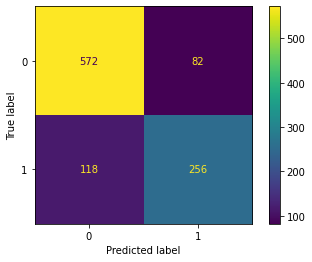

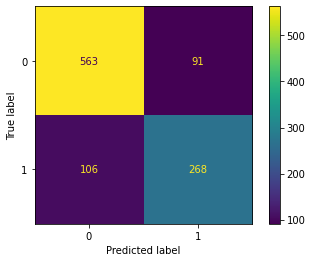

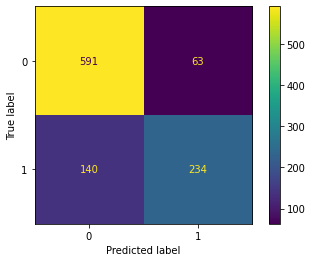

In [85]:
# Print Confusion matrix
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve

rf_model = RandomForestClassifier(n_estimators=100)
grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3)
svm_model = svm.SVC()

rf_model.fit(x_train, y_train)
grad.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

plot_confusion_matrix(rf_model, x_test, y_test , values_format='d')  
plot_confusion_matrix(grad, x_test, y_test , values_format='d')  
plot_confusion_matrix(svm_model, x_test, y_test , values_format='d')  

# **ROC AUC Curve**

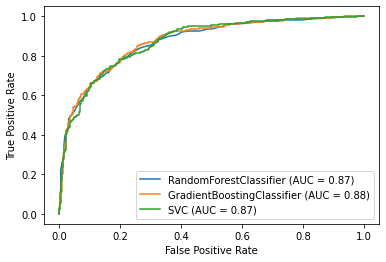

In [86]:
# Print ROC AUC curve for all three models
disp = plot_roc_curve(rf_model , x_test , y_test)
plot_roc_curve(grad , x_test , y_test , ax = disp.ax_);
plot_roc_curve(svm_model , x_test , y_test , ax = disp.ax_);

# **Try Models with WOE Features**

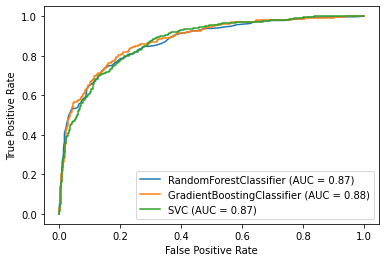

In [88]:
rf_model = RandomForestClassifier(n_estimators=100)
grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3)
svm_model = svm.SVC()

rf_model.fit(woe_train, y_woe_train)
grad.fit(woe_train, y_woe_train)
svm_model.fit(woe_train, y_woe_train)

# Print ROC AUC curve for all three models
disp = plot_roc_curve(rf_model , woe_test , y_woe_test)
plot_roc_curve(grad , woe_test , y_woe_test , ax = disp.ax_);
plot_roc_curve(svm_model , woe_test , y_woe_test , ax = disp.ax_);